In [3]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
# Step 1: Load the Data
df = pd.read_csv('weather.csv')


In [5]:
# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

<function matplotlib.pyplot.show(close=None, block=None)>

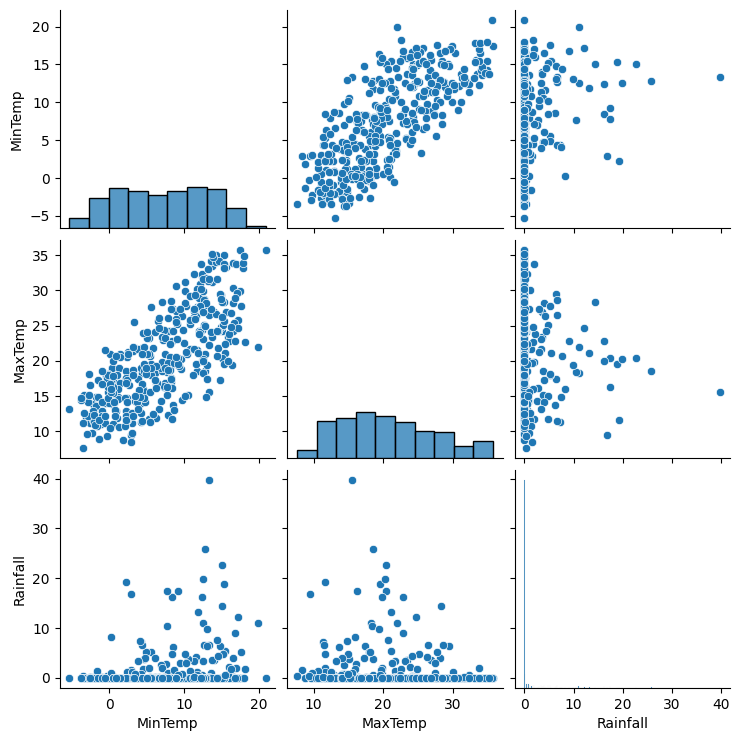

In [6]:
# Step 3: Data Visualization
sns.pairplot(df[['MinTemp','MaxTemp','Rainfall']])
plt.show

In [11]:
# Step 4: Feature Engineering
# Assuming 'RainTomorrow' is the target variable
# Create a binary variable indicating whether it will rain tomorrow or not
df['RainTomorrow_Binary'] = (df['RainTomorrow'] == 'Yes').astype(int)

# Interaction Features
df['MaxTemp*Sunshine'] = df['MaxTemp'] * df['Sunshine']
df['Rainfall*WindGustSpeed'] = df['Rainfall'] * df['WindGustSpeed']

# Display the modified dataset
print(df.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Cloud9am  Cloud3pm  \
0           30.0         SW         NW           6.0  ...         7         7   
1           39.0          E          W           4.0  ...         5         3   
2           85.0          N        NNE           6.0  ...         8         7   
3           54.0        WNW          W          30.0  ...         2         7   
4           50.0        SSE        ESE          20.0  ...         7         7   

   Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  RainTomorrow_Binary  \
0     14.4     23.6       

Overall Percentage of Rainy Days: 18.03%


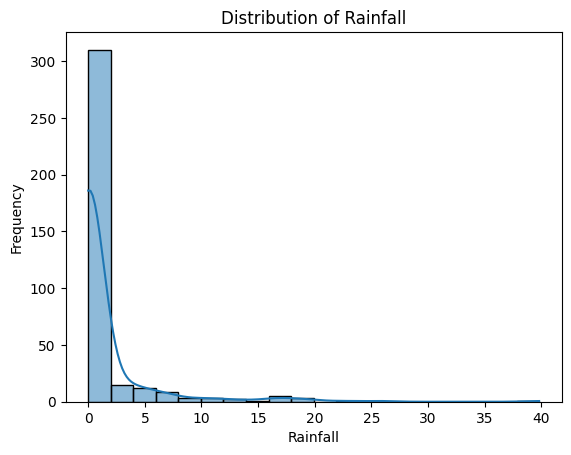

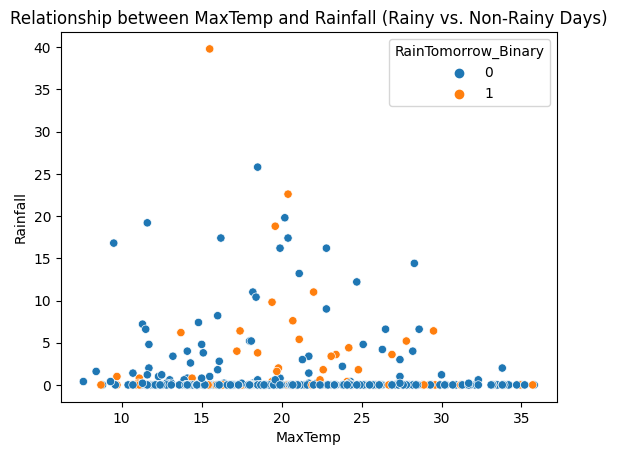

Average MaxTemp on Rainy Days: 21.25
Average Rainfall on Rainy Days: 2.63
Average MaxTemp on Non-Rainy Days: 20.40
Average Rainfall on Non-Rainy Days: 1.16


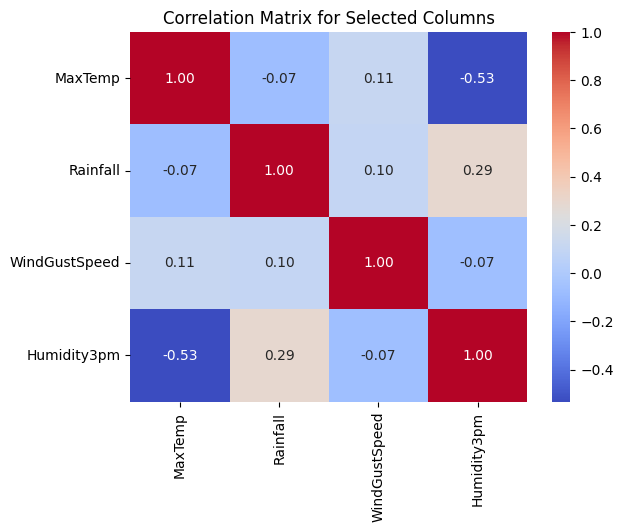

In [15]:
# Assuming 'RainTomorrow_Binary' is the binary target variable created in the feature engineering step
# Calculate the overall percentage of rainy days
overall_rainy_day_percentage = df['RainTomorrow_Binary'].mean() * 100
print(f'Overall Percentage of Rainy Days: {overall_rainy_day_percentage:.2f}%')

# Analyze the distribution of Rainfall
sns.histplot(df['Rainfall'], bins=20, kde=True)
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall')
plt.show()

# Explore the relationship between MaxTemp and Rainfall for rainy and non-rainy days
sns.scatterplot(x='MaxTemp', y='Rainfall', hue='RainTomorrow_Binary', data=df)
plt.xlabel('MaxTemp')
plt.ylabel('Rainfall')
plt.title('Relationship between MaxTemp and Rainfall (Rainy vs. Non-Rainy Days)')
plt.show()

# Calculate average MaxTemp and Rainfall by 'RainTomorrow_Binary'
avg_max_temp_rainy = df.groupby('RainTomorrow_Binary')['MaxTemp'].mean()
avg_rainfall_rainy = df.groupby('RainTomorrow_Binary')['Rainfall'].mean()
print(f'Average MaxTemp on Rainy Days: {avg_max_temp_rainy[1]:.2f}')
print(f'Average Rainfall on Rainy Days: {avg_rainfall_rainy[1]:.2f}')
print(f'Average MaxTemp on Non-Rainy Days: {avg_max_temp_rainy[0]:.2f}')
print(f'Average Rainfall on Non-Rainy Days: {avg_rainfall_rainy[0]:.2f}')

# Calculate correlation matrix for selected columns
selected_columns = ['MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity3pm']
correlation_matrix = df[selected_columns].corr()

# Display the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Columns')
plt.show()



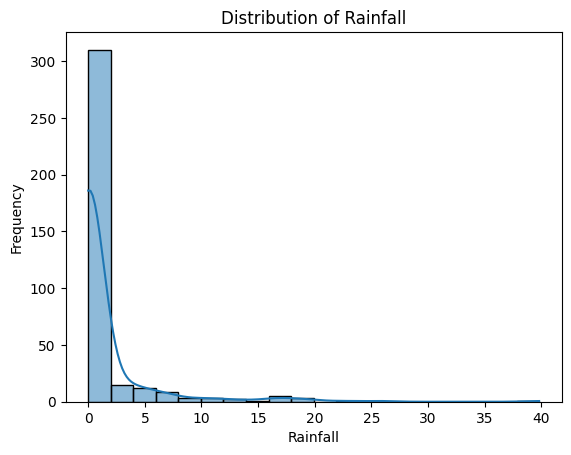

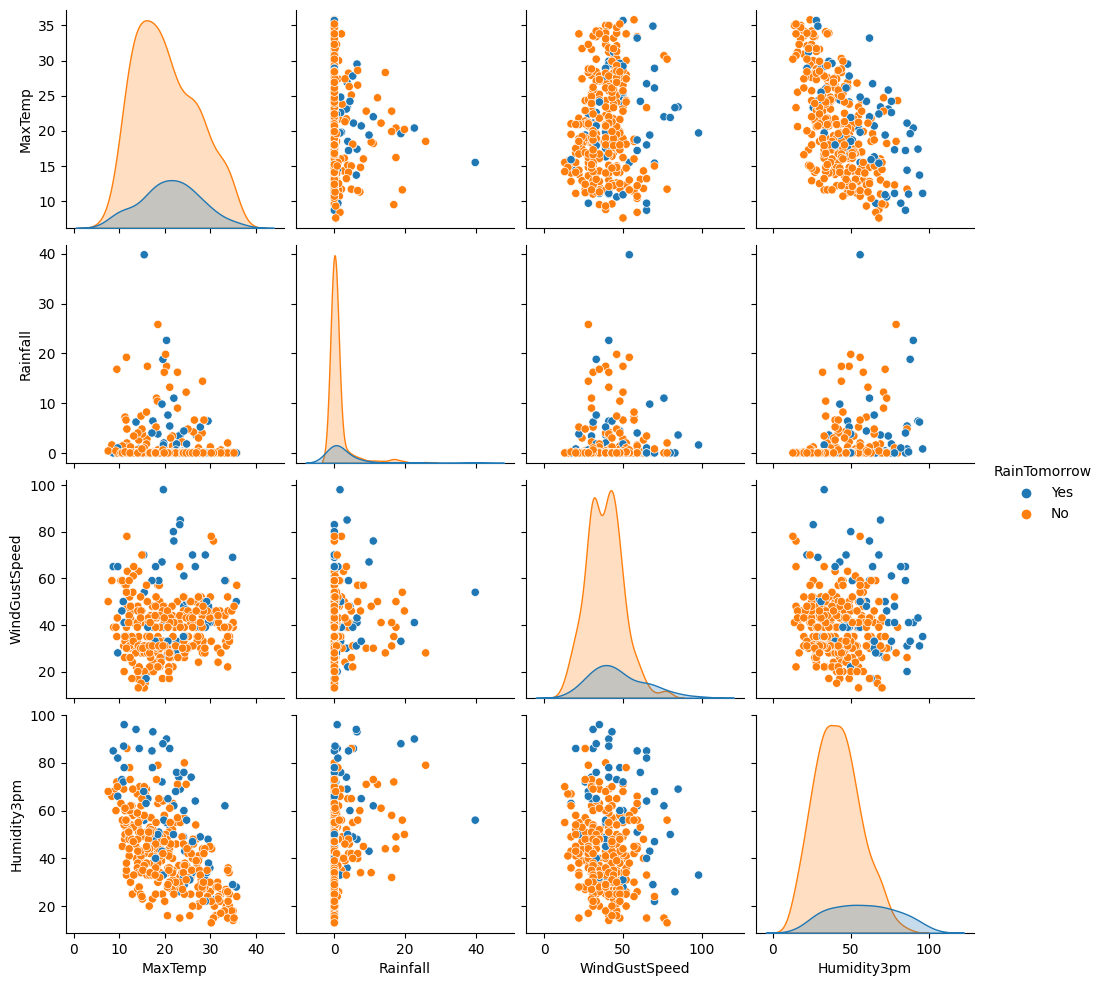

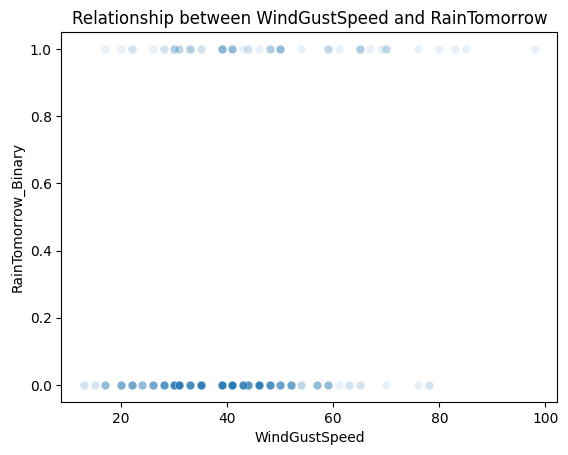

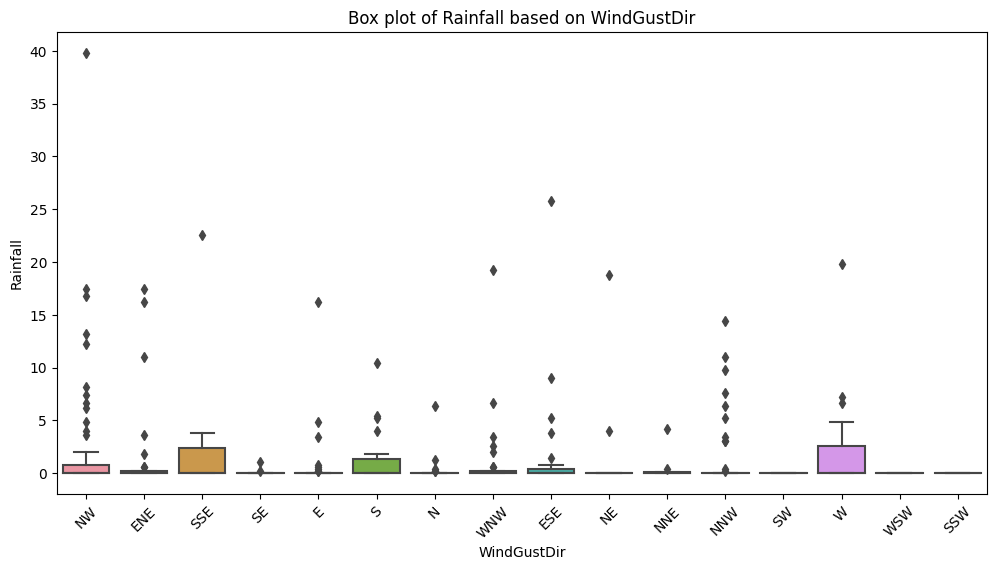

In [18]:
# Example: Visualize the distribution of Rainfall
sns.histplot(df['Rainfall'], bins=20, kde=True)
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall')
plt.show()

# Example: Pair plot with hue based on RainTomorrow
sns.pairplot(df[['MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity3pm', 'RainTomorrow']], hue='RainTomorrow', diag_kind='kde')
plt.show()

# Example: Visualize the relationship between WindGustSpeed and RainTomorrow
sns.scatterplot(x='WindGustSpeed', y='RainTomorrow_Binary', data=df, alpha=0.1)
plt.xlabel('WindGustSpeed')
plt.ylabel('RainTomorrow_Binary')
plt.title('Relationship between WindGustSpeed and RainTomorrow')
plt.show()

# Example: Box plot for Rainfall based on WindGustDir
plt.figure(figsize=(12, 6))
sns.boxplot(x='WindGustDir', y='Rainfall', data=df)
plt.xlabel('WindGustDir')
plt.ylabel('Rainfall')
plt.title('Box plot of Rainfall based on WindGustDir')
plt.xticks(rotation=45)
plt.show()


Mean Squared Error for Rainfall Prediction: 37.0768456005826


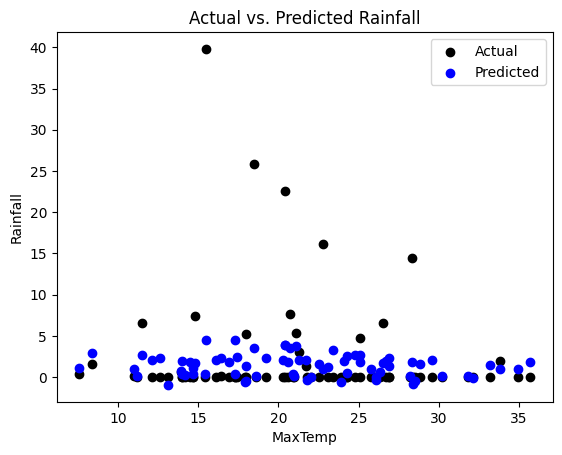

In [21]:
# Step 7: Advanced Analysis (e.g., predict Rainfall)

# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

# Visualize the predictions against the actual values
plt.scatter(X_test['MaxTemp'], y_test, color='black', label='Actual')
plt.scatter(X_test['MaxTemp'], y_pred, color='blue', label='Predicted')
plt.xlabel('MaxTemp')
plt.ylabel('Rainfall')
plt.legend()
plt.title('Actual vs. Predicted Rainfall')
plt.show()

Date column not found in the dataset. Please adjust accordingly.
Average Rainfall on High Temperature Days (>30°C): 0.08 mm
Average Rainfall on Low Temperature Days (<10°C): 2.24 mm
Correlation with Rainfall:
Rainfall                  1.000000
Rainfall*WindGustSpeed    0.965240
Humidity3pm               0.289013
WindSpeed9am              0.219637
MinTemp                   0.201939
Cloud9am                  0.180046
Humidity9am               0.150109
Cloud3pm                  0.127792
WindGustSpeed             0.096190
RISK_MM                   0.089860
Temp9am                   0.077299
WindSpeed3pm              0.056008
Evaporation              -0.007293
MaxTemp                  -0.073560
Temp3pm                  -0.087493
MaxTemp*Sunshine         -0.150174
Sunshine                 -0.150990
Pressure3pm              -0.250218
Pressure9am              -0.331581
Name: Rainfall, dtype: float64


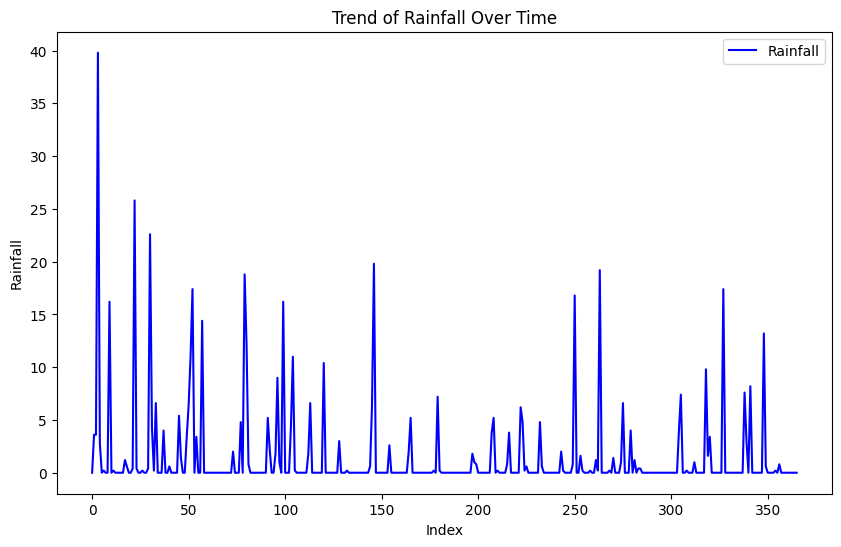

In [40]:
# Example: Identify the highest and lowest rainfall months
if 'Date' in df.columns:
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    monthly_avg_rainfall = df.groupby('Month')['Rainfall'].mean()

    highest_rainfall_month = monthly_avg_rainfall.idxmax()
    lowest_rainfall_month = monthly_avg_rainfall.idxmin()
    print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')
else:
    print("Date column not found in the dataset. Please adjust accordingly.")

# Example: Calculate the average Rainfall on high and low-temperature days
avg_rainfall_high_temp = df[df['MaxTemp'] > 30]['Rainfall'].mean()
avg_rainfall_low_temp = df[df['MaxTemp'] < 10]['Rainfall'].mean()

print(f'Average Rainfall on High Temperature Days (>30°C): {avg_rainfall_high_temp:.2f} mm')
print(f'Average Rainfall on Low Temperature Days (<10°C): {avg_rainfall_low_temp:.2f} mm')

# Example: Check the correlation between Rainfall and other variables
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_with_rainfall = df[numeric_columns].corr()['Rainfall'].sort_values(ascending=False)
print(f'Correlation with Rainfall:\n{corr_with_rainfall}')

# Example: Visualize the trend of Rainfall over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Rainfall'], label='Rainfall', color='blue')
plt.xlabel('Index')
plt.ylabel('Rainfall')
plt.title('Trend of Rainfall Over Time')
plt.legend()
plt.show()

